# <font color=red> Backery shop: how to move out from Berlin and not lost yourself in Sofia, Bulgaria.  </font>

## 1. Introduction
### 1.1 Background <br>


After 6 years living in Berlin my friend decided to move home to Bulgaria and open in Sofia backery shop with national breakfast kitchen. To meet this decision were taken different factors in consideration. 

Sofia is the biggest city in Bulgaria, and  the 15th largest city in the European Union [1]

In the recent time the city became fast developing tourist destination, since 2009 the city has been experiencing a stable growth in tourism - approximately 13% in both 2016 and 2017, that is expected to continue in the coming years, though at a lower rate. [2]

Sofia Airport launched 42 new routes between 2015-2018, including new direct flights to such destinations as Baku, Nice, Malaga, etc. A new line to Beijing is planned for 2020. [2]

Most of the visitors (87% in 2016) comming to Sofia for leasure purpose.  

Sofia is among the top 3 cities in Europe with the highest growth of international visitors. The average increase for the period between 2009 and 2016 was 9.4% according to the Mastercard Global Destination Cities Index report published in September 2017. [2]

The Daily Backpacker Index for Sofia in 2018 is 53.05 BGN or around 27.11 Euro and includes a night stay at a centrally-located hostel with good reviews, transportation, and food and entertainment costs. [2]


Therefore, it is advantageous for my friend to accurately predict in which areas of the city may occure high demand on the caffe breakfast service and in which areas the target group may be found. 

### 1.2 Problem <br>
The analyse of availible data source can help us to deremine the places where the potential consumer may be founded, and especially:

1. Tourists who wants to start a day with affordable and on good qulity national breakfast <br>

2. Freelancer who loves to have their own caffe as work place <br>


### 1.3 Objective <br>

The aim of this report is to analyse different locations in Sofia and group them into simillar clusters, which can help us to:

1. Find ideal locations for caffe close to main touristic accomodations with low compteions from other players<br>

2. Find ideal locations for advertising of new caffe <br>


### 1.4  Target Audience

The provided information would be interesting for everyone who wants to open own restourant or caffe business, or other tourism relevant services, which would benefit of knowing the main touristic allocations and saturation of those places with relevant services. 

## 2. Data Sources <br>


Taking into consideration main goal of the project we can use following datas: <br>
    
1. Sofia Neighborhood Data: The Wikipedia page 'Districts of Sofia' was scraped to pull out the necessary information. [3]  <br>
The information obtained i.e. the table of postal codes was transformed into a pandas data frame for further analysis.   

2. Coordinate data for each Neighborhood in Sofia. I used Nominatim to get the center coordinates of the each Neighborhood and coordinates for every required adress [4]  <br>

3. Forsquare API to get the information of restaurants, caffe and hotels venues of given neighborhoods and borough of Sofia [5]




[1] https://en.wikipedia.org/wiki/List_of_cities_in_the_European_Union_by_population_within_city_limits  <br>
[2] https://investsofia.com/wp-content/uploads/2018/09/Sofia-Tourism-and-Air-Transport-Market-September-2018.pdf    <br>
[3] https://en.wikipedia.org/wiki/Districts_of_Sofia  <br>
[4] http://nominatim.org/  <br>
[5] Forsquare API - https://developer.foursquare.com/docs/api

## 3.Methodology <br>


### 3.1 Importing Libraries 

In [45]:
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import math
import shapely.geometry
import pyproj
import math

### 3.2 Getting names and coordinates of districts in Sofia

#### Processing information from Wiki Page

In [41]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Districts_of_Sofia').text


#### Creating Beautifull Soup


In [42]:
soup = BeautifulSoup(response_obj,'lxml')

Wards_Sofia = soup.find('table', {'class':'wikitable sortable'})



num=[]
Name=[]
Idle = []
Popul = []
Type = []


for row in Wards_Sofia.findAll("tr"):
    #print (row)    
    Ward = row.findAll('td')
#     print (len(Ward))
#     print (Ward)
    if len(Ward)==5: #Only extract table body not heading
        print (Ward[0])
        #print postcode[1]
        #print postcode[2]
        num.append(Ward[0].find(text=True))
        Name.append(Ward[1].find(text=True))
        Idle.append(Ward[2].find(text=True))
        Popul.append(Ward[3].find(text=True))
        Type.append(Ward[4].find(text=True))
            
print (Popul) 




<td>1</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6</td>
<td>7</td>
<td>8</td>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
<td>13</td>
<td>14</td>
<td>15</td>
<td>16</td>
<td>17</td>
<td>18</td>
<td>19</td>
<td>20</td>
<td>21</td>
<td>22</td>
<td>23</td>
<td>24</td>
<td></td>


In [454]:
df=pd.DataFrame(Name,columns=['Name'])
df['Idle']=Idle
df['Population'] = Popul
df['Type'] = Type
df['Name'] =  df['Name'].astype(str) + ', Sofia'

df.head(34)

,Name,Idle,Population,Type
0,"Bankya, Sofia",10.4,"9,186",Town
1,"Vitosha, Sofia",3.5,"42,953",Suburb
2,"Vrabnitsa, Sofia",4.6,"47,417",Urban
3,"Vazrazhdane, Sofia",5.3,"47,794",Urban
4,"Izgrev, Sofia",3.1,"33,611",Urban
5,"Ilinden, Sofia",4.5,"37,256",Urban
6,"Iskar, Sofia",3.9,"69,896",Urban
7,"Krasna polyana, Sofia",9.2,"65,442",Urban
8,"Krasno selo, Sofia",3.7,"72,302",Urban
9,"Kremikovtsi, Sofia",5.8,"23,599",Suburb


In [306]:
sofia_center = ['Izgrev, Sofia','Krasna polyana, Sofia','Krasno selo, Sofia','Lozenets, Sofia','Lyulin, Sofia','Mladost, Sofia','Nadezhda, Sofia','Novi Iskar, Sofia','Ovcha kupel, Sofia','Oborishte, Sofia','Poduene, Sofia','Serdika, Sofia','Slatina, Sofia','Studentski, Sofia','Triaditsa, Sofia']

#### Finding coordinates of Sofia districts 

In [44]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Sofia_explorer")

df['Latitude']= df['Name'].apply(geolocator.geocode, timeout=15).apply(lambda x: (x.latitude))

df['Longitude']= df['Name'].apply(geolocator.geocode, timeout=15).apply(lambda x: (x.longitude))

sofia_city_data = df.head()

sofia_city_data = df.head()


,Name,Idle,Population,Type,Latitude,Longitude
0,"Bankya, Sofia",10.4,"9,186",Town,42.710125,23.146497
1,"Vitosha, Sofia",3.5,"42,953",Suburb,42.560000,23.280000
2,"Vrabnitsa, Sofia",4.6,"47,417",Urban,42.759103,23.247337
3,"Vazrazhdane, Sofia",5.3,"47,794",Urban,42.777602,23.493854
4,"Izgrev, Sofia",3.1,"33,611",Urban,42.670481,23.351794


In [122]:

sofia_city_data = df

sofia_city_data.head()

,Name,Idle,Population,Type,Latitude,Longitude
0,"Bankya, Sofia",10.4,"9,186",Town,42.710125,23.146497
1,"Vitosha, Sofia",3.5,"42,953",Suburb,42.560000,23.280000
2,"Vrabnitsa, Sofia",4.6,"47,417",Urban,42.759103,23.247337
3,"Vazrazhdane, Sofia",5.3,"47,794",Urban,42.777602,23.493854
4,"Izgrev, Sofia",3.1,"33,611",Urban,42.670481,23.351794


#### Vizulization of district centers

In [159]:
import folium


f = folium.Figure(width=1000, height=500)

Sofia_map = folium.Map(location=[Sofia_latitude, Sofia_longitude], zoom_start=12).add_to(f)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], 
                           df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
        radius=9,popup=label,color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Sofia_map)
    
Sofia_map


### 3.3 Finding the most touristic cluster in Sofia

#### Getting ready to use FourSquare API 

In [455]:
CLIENT_ID = 'XXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXX' # your Foursquare Secret
VERSION = 'XXXX'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXX
CLIENT_SECRET:XXXX


In [307]:
radius = 5000
LIMIT = 1000

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [308]:
sofia_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
sofia_venues.head()



,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,"Bankya, Sofia",42.710125,23.146497,Тенис Клуб Банкя (Bankia Tennis Club),42.710281,23.148693,Tennis Stadium
1,"Bankya, Sofia",42.710125,23.146497,Централен Парк Банкя,42.707522,23.144989,Park
2,"Bankya, Sofia",42.710125,23.146497,"Плувен басейн ""Здраве""",42.709876,23.146219,Pool
3,"Bankya, Sofia",42.710125,23.146497,Ресторанта На Кортовете,42.710298,23.148785,Restaurant
4,"Bankya, Sofia",42.710125,23.146497,Aqualand Bankya,42.706415,23.146734,Pool


In [309]:
sofia_venues=sofia_venues[sofia_venues['District'].isin(sofia_center)]

In [310]:
sofia_venues.head()

,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
88,"Izgrev, Sofia",42.670481,23.351794,Gelato & Latte Este,42.669088,23.353237,Ice Cream Shop
89,"Izgrev, Sofia",42.670481,23.351794,Yoga Vibe,42.673738,23.357900,Yoga Studio
90,"Izgrev, Sofia",42.670481,23.351794,Coco Nail House,42.670876,23.351541,Nail Salon
91,"Izgrev, Sofia",42.670481,23.351794,"Гостилница ""Мерак""",42.669271,23.358134,Bulgarian Restaurant
92,"Izgrev, Sofia",42.670481,23.351794,Градинката на Петър Дънов (Petar Danov memoria...,42.670420,23.346053,Garden


In [386]:
sofia_venues['Venue_Category'].unique()

array(['Ice Cream Shop', 'Yoga Studio', 'Nail Salon',
       'Bulgarian Restaurant', 'Garden', 'Gym', 'Cheese Shop', 'Park',
       'Theme Park', 'Science Museum', 'Health & Beauty Service', 'Lake',
       'Pizza Place', 'Pharmacy', 'Gym / Fitness Center', 'Restaurant',
       'Sushi Restaurant', 'Dessert Shop', 'Bakery', 'Clothing Store',
       'Boutique', 'Cosmetics Shop', 'Breakfast Spot',
       'Vegetarian / Vegan Restaurant', 'Pet Store', 'Coffee Shop',
       'Beer Store', 'Cupcake Shop', 'Café', 'Hobby Shop', 'Speakeasy',
       'Bookstore', 'Cocktail Bar', 'Modern European Restaurant',
       'Indian Restaurant', 'Nightclub', 'Hotel',
       'Southern / Soul Food Restaurant', 'Arts & Crafts Store',
       'Beer Bar', 'Camera Store', 'Recreation Center',
       'Seafood Restaurant', 'Bar', 'Soup Place', 'Japanese Restaurant',
       'Italian Restaurant', 'Theater', 'Sandwich Place', 'Juice Bar',
       'Gastropub', 'Steakhouse', 'Doner Restaurant', 'Soccer Field',
       'Burg

#### Analyze Each Neighborhood

In [311]:
# one hot encoding
sofia_onehot = pd.get_dummies(sofia_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sofia_onehot['District'] = sofia_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [sofia_onehot.columns[-1]] + list(sofia_onehot.columns[:-1])
sofia_onehot = sofia_onehot[fixed_columns]

sofia_onehot.head()

,District,Airport Service,Art Gallery,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Stadium,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
88,"Izgrev, Sofia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,"Izgrev, Sofia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90,"Izgrev, Sofia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,"Izgrev, Sofia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,"Izgrev, Sofia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [312]:
sofia_onehot.shape

(1410, 151)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [313]:
sofia_grouped = sofia_onehot.groupby('District').mean().reset_index()
sofia_grouped.head()

,District,Airport Service,Art Gallery,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Stadium,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,"Izgrev, Sofia",0.0,0.00,0.01,0.00,0.00,0.0,0.05,0.02,0.0,...,0.0,0.0,0.03,0.0,0.00,0.00,0.0,0.0,0.0,0.01
1,"Krasna polyana, Sofia",0.0,0.01,0.01,0.00,0.00,0.0,0.06,0.03,0.0,...,0.0,0.0,0.03,0.0,0.00,0.01,0.0,0.0,0.0,0.02
2,"Krasno selo, Sofia",0.0,0.00,0.01,0.01,0.00,0.0,0.06,0.01,0.0,...,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.0,0.03
3,"Lozenets, Sofia",0.0,0.00,0.02,0.00,0.00,0.0,0.05,0.02,0.0,...,0.0,0.0,0.03,0.0,0.00,0.00,0.0,0.0,0.0,0.01
4,"Lyulin, Sofia",0.0,0.01,0.00,0.00,0.04,0.0,0.02,0.02,0.0,...,0.0,0.0,0.00,0.0,0.01,0.00,0.0,0.0,0.0,0.00


#### Let's confirm the new size

In [314]:
sofia_grouped.shape

(15, 151)

In [315]:
sofia_grouped[['District', 'Hotel']].head()

,District,Hotel
0,"Izgrev, Sofia",0.01
1,"Krasna polyana, Sofia",0.00
2,"Krasno selo, Sofia",0.01
3,"Lozenets, Sofia",0.01
4,"Lyulin, Sofia",0.00


#### Let's print each neighborhood along with the top 5 most common venues

In [316]:
num_top_venues = 5

for hood in sofia_grouped['District']:
    print("----"+hood+"----")
    temp = sofia_grouped[sofia_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Izgrev, Sofia----
         venue  freq
0         Park  0.11
1   Restaurant  0.07
2  Coffee Shop  0.05
3       Bakery  0.05
4          Gym  0.04


----Krasna polyana, Sofia----
                  venue  freq
0                  Park  0.08
1                Bakery  0.06
2           Coffee Shop  0.06
3    Italian Restaurant  0.05
4  Gym / Fitness Center  0.04


----Krasno selo, Sofia----
                  venue  freq
0           Coffee Shop  0.07
1  Gym / Fitness Center  0.06
2                Bakery  0.06
3                  Park  0.06
4    Italian Restaurant  0.04


----Lozenets, Sofia----
                venue  freq
0                Park  0.09
1          Restaurant  0.05
2         Coffee Shop  0.05
3              Bakery  0.05
4  Italian Restaurant  0.05


----Lyulin, Sofia----
                  venue  freq
0           Pizza Place  0.10
1            Restaurant  0.08
2                   Gym  0.07
3           Supermarket  0.06
4  Gym / Fitness Center  0.05


----Mladost, Sofia----
        

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [317]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [326]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = sofia_grouped['District']

for ind in np.arange(sofia_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sofia_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Izgrev, Sofia",Park,Restaurant,Bakery,Coffee Shop,Gym,Vegetarian / Vegan Restaurant,Bulgarian Restaurant,Cupcake Shop,Clothing Store,Pizza Place
1,"Krasna polyana, Sofia",Park,Bakery,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Bar,Vegetarian / Vegan Restaurant,Dessert Shop,Bookstore,Restaurant
2,"Krasno selo, Sofia",Coffee Shop,Gym / Fitness Center,Bakery,Park,Italian Restaurant,Café,Gym,Dessert Shop,Supermarket,Cosmetics Shop
3,"Lozenets, Sofia",Park,Bakery,Italian Restaurant,Restaurant,Coffee Shop,Theater,Dessert Shop,Ice Cream Shop,Vegetarian / Vegan Restaurant,Gym / Fitness Center
4,"Lyulin, Sofia",Pizza Place,Restaurant,Gym,Supermarket,Park,Gym / Fitness Center,BBQ Joint,Café,Dessert Shop,Bar


<a id='item4'></a>

#### Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [327]:
sofia_city_data = sofia_city_data.rename(columns={"Name": "District"})


In [328]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [329]:
Sum_of_squared_distances = []

sofia_grouped_clustering = sofia_grouped.drop('District', 1)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sofia_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

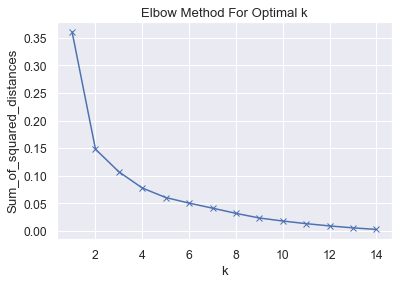

In [330]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [331]:
# set number of clusters
kclusters = 6

sofia_grouped_clustering = sofia_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sofia_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 5, 4, 2, 1, 2, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [332]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge sofia_grouped with sofia_data to add latitude/longitude for each neighborhood
sofia_merged = sofia_city_data.join(neighborhoods_venues_sorted.set_index('District'), on='District')


sofia_merged = sofia_merged.fillna(0)

sofia_merged['Cluster Labels'] = sofia_merged['Cluster Labels'].astype(int)

sofia_merged.head() # check the last columns!

,District,Idle,Population,Type,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bankya, Sofia",10.4,"9,186",Town,42.710125,23.146497,0,0,0,0,0,0,0,0,0,0,0
1,"Vitosha, Sofia",3.5,"42,953",Suburb,42.560000,23.280000,0,0,0,0,0,0,0,0,0,0,0
2,"Vrabnitsa, Sofia",4.6,"47,417",Urban,42.759103,23.247337,0,0,0,0,0,0,0,0,0,0,0
3,"Vazrazhdane, Sofia",5.3,"47,794",Urban,42.777602,23.493854,0,0,0,0,0,0,0,0,0,0,0
4,"Izgrev, Sofia",3.1,"33,611",Urban,42.670481,23.351794,3,Park,Restaurant,Bakery,Coffee Shop,Gym,Vegetarian / Vegan Restaurant,Bulgarian Restaurant,Cupcake Shop,Clothing Store,Pizza Place


Finally, let's visualize the resulting clusters

In [333]:
import folium


z = folium.Figure(width=1000, height=500)

map_clusters = folium.Map(location=[Sofia_latitude, Sofia_longitude], zoom_start=12).add_to(z)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sofia_merged['Latitude'], sofia_merged['Longitude'], sofia_merged['District'], sofia_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

#### Examine main clusters

In [334]:
sofia_merged.loc[sofia_merged['Cluster Labels'] == 2, sofia_merged.columns[[0] + list(range(6, sofia_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"Nadezhda, Sofia",2,Bar,Park,Bulgarian Restaurant,Italian Restaurant,Dessert Shop,Hotel,Coffee Shop,Restaurant,Gym / Fitness Center,Burger Joint
16,"Oborishte, Sofia",2,Park,Bar,Restaurant,Bakery,Theater,Italian Restaurant,Cupcake Shop,Coffee Shop,Café,Hotel
18,"Poduene, Sofia",2,Park,Theater,Bar,Bakery,Restaurant,Café,Cupcake Shop,Yoga Studio,Cocktail Bar,Hotel
19,"Serdika, Sofia",2,Bar,Park,Theater,Bakery,Hotel,Cocktail Bar,Restaurant,Café,Italian Restaurant,Dessert Shop


#### Cluster 3

In [335]:
sofia_merged.loc[sofia_merged['Cluster Labels'] == 3, sofia_merged.columns[[0] + list(range(6, sofia_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Izgrev, Sofia",3,Park,Restaurant,Bakery,Coffee Shop,Gym,Vegetarian / Vegan Restaurant,Bulgarian Restaurant,Cupcake Shop,Clothing Store,Pizza Place
7,"Krasna polyana, Sofia",3,Park,Bakery,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Bar,Vegetarian / Vegan Restaurant,Dessert Shop,Bookstore,Restaurant
8,"Krasno selo, Sofia",3,Coffee Shop,Gym / Fitness Center,Bakery,Park,Italian Restaurant,Café,Gym,Dessert Shop,Supermarket,Cosmetics Shop
10,"Lozenets, Sofia",3,Park,Bakery,Italian Restaurant,Restaurant,Coffee Shop,Theater,Dessert Shop,Ice Cream Shop,Vegetarian / Vegan Restaurant,Gym / Fitness Center
23,"Triaditsa, Sofia",3,Bakery,Restaurant,Coffee Shop,Park,Gym / Fitness Center,Italian Restaurant,Cheese Shop,Dessert Shop,Vegetarian / Vegan Restaurant,Modern European Restaurant


### 3.4 Finding the best district in the cluster 3 for cafe

[1, 1, 2, 1, 0, 4, 5, 0, 3, 0, 3, 4, 2, 3, 1]


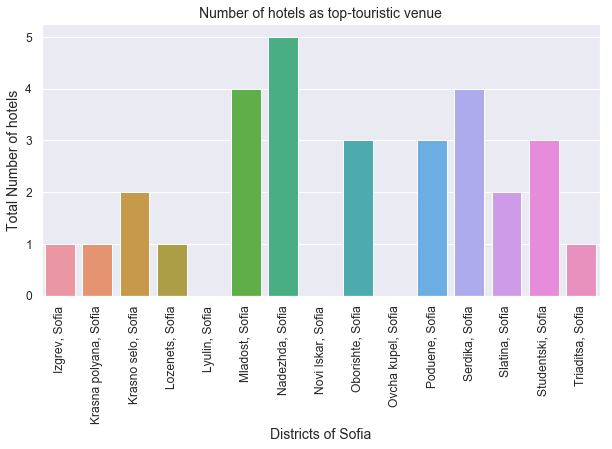

In [396]:
#try groupby to play with hotel 
sofia_hotel = sofia_venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Hotel|Hostel')].count())
sofia_hotel_df = sofia_hotel.to_frame().reset_index()
sofia_hotel_df.columns = ['District', 'Number of hotel']
#sofia_hotel.columns = ['District', 'Number of hotel']
#print (type(sofia_hotel))
sofia_hotel_df.index = np.arange(1, len(sofia_hotel_df)+1)

#print ("shape of the dataframe: ", sofia_hotel_df.shape)
#print (sofia_hotel_df.head(5))
#print (type(sofia_hotel_df[['Number of hotel']]))
list_rest_no = sofia_hotel_df['Number of hotel'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(10,5))
bar = sns.barplot(x='District', y='Number of hotel', data=sofia_hotel_df)

bar.set_ylabel("Total Number of hotels", fontsize=14)
bar.set_xlabel("Districts of Sofia", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
bar.set_title("Number of hotels as top-touristic venue", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

[2, 3, 3, 2, 4, 2, 1, 0, 3, 4, 4, 3, 1, 5, 2]


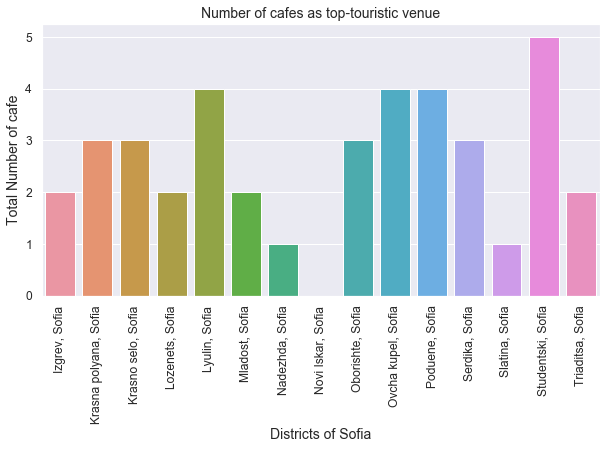

In [453]:
#try groupby to play with hotel 
sofia_hotel = sofia_venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Café')].count())
sofia_hotel_df = sofia_hotel.to_frame().reset_index()
sofia_hotel_df.columns = ['District', 'Number of cafe']
#sofia_hotel.columns = ['District', 'Number of hotel']
#print (type(sofia_hotel))
sofia_hotel_df.index = np.arange(1, len(sofia_hotel_df)+1)

#print ("shape of the dataframe: ", sofia_hotel_df.shape)
#print (sofia_hotel_df.head(5))
#print (type(sofia_hotel_df[['Number of hotel']]))
list_rest_no = sofia_hotel_df['Number of cafe'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(10,5))
bar = sns.barplot(x='District', y='Number of cafe', data=sofia_hotel_df)

bar.set_ylabel("Total Number of cafe", fontsize=14)
bar.set_xlabel("Districts of Sofia", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=90)
bar.set_title("Number of cafes as top-touristic venue", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

## 4. Results  

The result of the exploratory data analysis and clustering are summarized below: 

* The number of Hotels and Hostels in the Sofia is pretty low, followed with low saturation of cafes it gives the good opportunities to start a business
* Cluster Analyses shows that the central area of Sofia can be divided on the art of venues on two parts - "Touristic Nord", which has high saturation on hotels and theaters, and "Living South", where are concentrated recreation activities like Gym, Cafes, Supermarkets
* For cafe is the best idea to find location in cluster North.
* Analyzing the competitions of cafes in different districts of North cluster, most profitable looks Nadezhda district, where we can find 5 Hotels with only one Cafe.
* Thanks analyze we got a list of all touristic venues, which can be suitable for online advertising.




## 5. Discussion 

According to this analysis, Nadezhda district seems to be one of the most promising area, with high frequency on typical touristic attractions and low number of breakfast infrastructure.

But we need to take into consideration that the clustering was completely based on the most common venues obtained from Foursquare data, which numbers seems to be a bit outdated and unrealistically low. The additional verification via 3th party sources would be beneficial.

Also I didn't took into analysis the rental prices in different districts, which can play a role.

The analysis itself lacks on the granularity, the better idea seems the dividing the city with the artificial grid like squares 200*200 meters and proceeding cluster analysis on their base, it can give better understanding of areas. But with number of valuable data's in Foursquare it doesn't make so much sense, pother sources are here required.


## 6. Conclusion

Finally finishing this project.

I got the idea how data-science projects should look like, got in my hand great data science tioolkit with powerfull libraries and technic. 

The project changed my perception how the obvious questions could be solved more efficient way, and the results can drastically vary from initial expectations.